In [ ]:
## packages for data analysis
import pandas as pd
import numpy as np
## visualize your data
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/Fraud.csv")
features = data.columns[:-1].tolist()

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [ ]:
data[features].head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0


In [ ]:
##number of fraud cases
fraud_cases = len(data[data['isFraud']==1])
print('Number of Fraud cases:',fraud_cases)

Number of Fraud cases: 157


In [ ]:
## no of non-fraud cases
non_fraud_cases=len(data[data['isFraud']==0])
print('Number of non-fraud cases:',non_fraud_cases)

Number of non-fraud cases: 233234


**I AM DOING MY PROJECT IN GOOGLE COLAB BECAUSE HERE I HAVE BENEFIT OF GPU ACCESS BUT I HAD A PROBLEM WHILE UPLODING THE DATASET INTO COLAB.HERE WE ARE WORKING WITH SOME PORTION OF DATASET BECAUSE OF THIS PROBLEM.AND IF THE PROBLEM IS RESOLVED WE CAN USE SAME TECHNIQUES TO UNDERSTAND AND PREDICT FULL DATASET AND WE MAY HAVE EVEN GOOD RESULTS.**

In [ ]:
data.shape

(233392, 11)

MISSING VALUES

In [ ]:

data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [ ]:
## DESCRIPTIVE STATISTICS
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,233392.000000,2.333920e+05,2.333920e+05,2.333910e+05,2.333910e+05,2.333910e+05,233391.000000,233391.0
mean,10.544663,1.802717e+05,8.749082e+05,8.930842e+05,9.560490e+05,1.192962e+06,0.000673,0.0
std,2.294623,3.211026e+05,2.785765e+06,2.822999e+06,2.369945e+06,2.627492e+06,0.025928,0.0
min,1.000000,3.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,9.000000,1.237020e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,11.000000,7.252839e+04,1.880450e+04,0.000000e+00,6.056711e+04,1.554920e+05,0.000000,0.0
75%,12.000000,2.313674e+05,1.849885e+05,2.232119e+05,8.034943e+05,1.208052e+06,0.000000,0.0
max,14.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.904990e+07,3.985396e+07,1.000000,0.0


In [ ]:
## INFORMATION
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233392 entries, 0 to 233391
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            233392 non-null  int64  
 1   type            233392 non-null  object 
 2   amount          233392 non-null  float64
 3   nameOrig        233392 non-null  object 
 4   oldbalanceOrg   233392 non-null  float64
 5   newbalanceOrig  233391 non-null  float64
 6   nameDest        233391 non-null  object 
 7   oldbalanceDest  233391 non-null  float64
 8   newbalanceDest  233391 non-null  float64
 9   isFraud         233391 non-null  float64
 10  isFlaggedFraud  233391 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 19.6+ MB


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
## check the datatypes
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

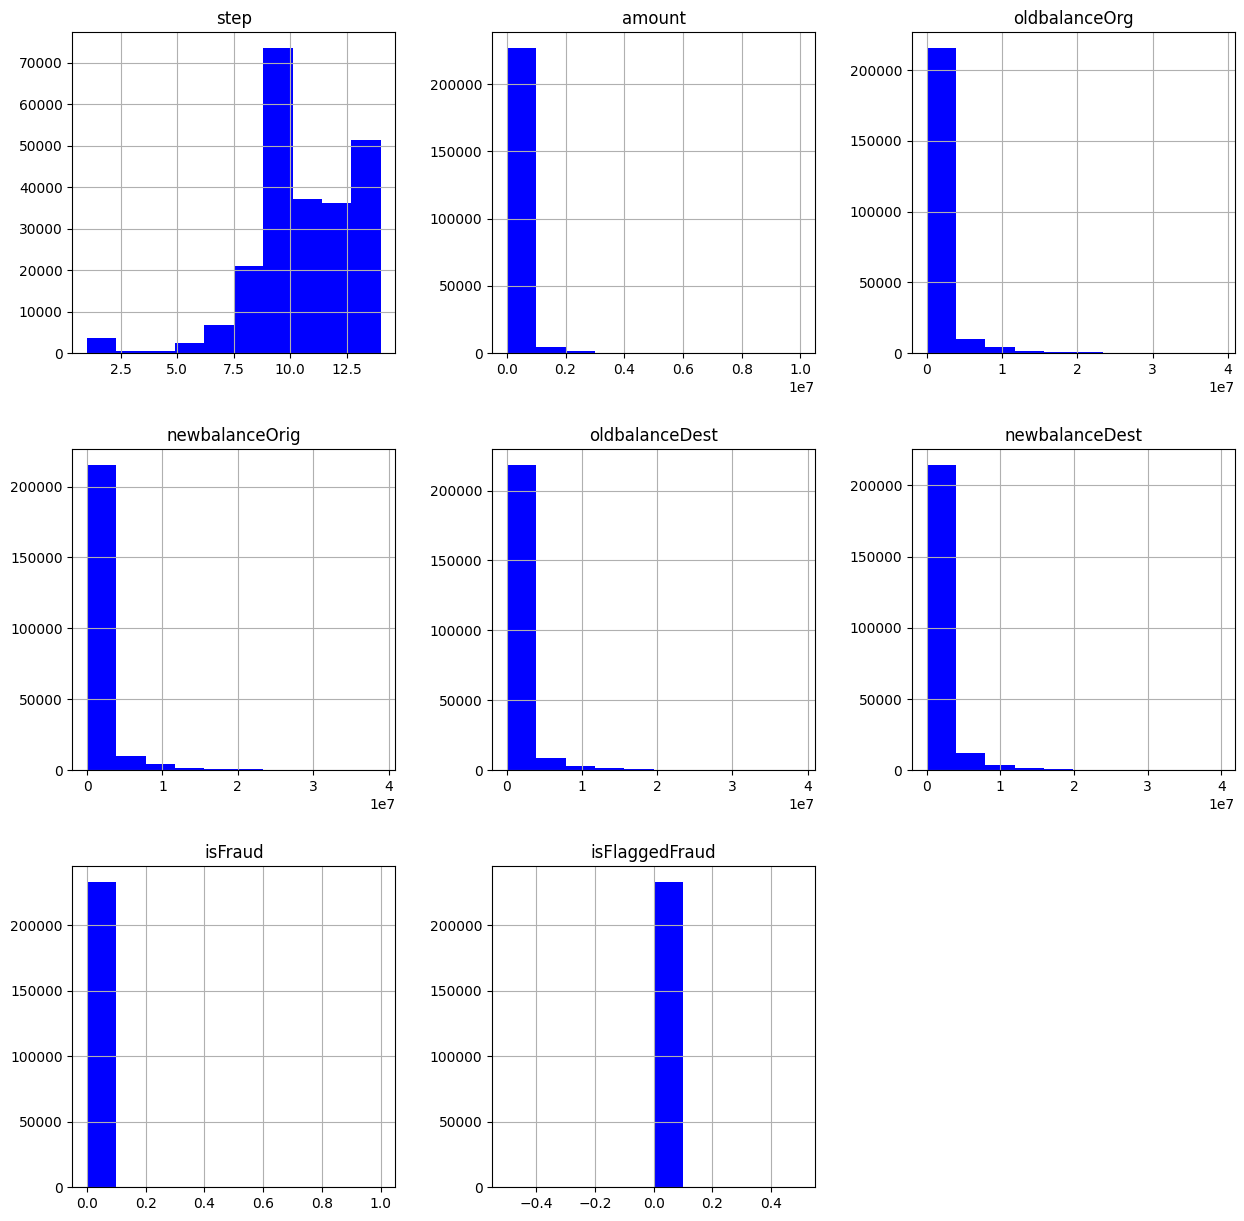

In [ ]:
## EXPLORATIVE DATA AANALYSIS
## univariate analysis
data.hist(figsize=(15,15),color='blue')
plt.show()

FOR CHECKING OUTLIERS

<Axes: >

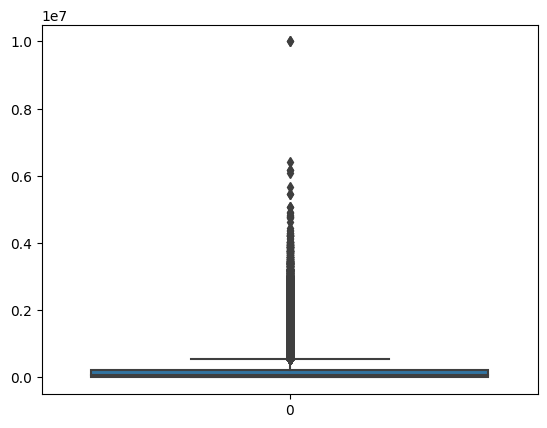

In [ ]:
## check for outliers
sns.boxplot(data['amount'])

SOMETIMES IT'S BETTER TO KEEP OUTLIES WHY BECAUSE
1.Simply removing or modifying outliers might not always be the best strategy, especially if they correspond to actual fraudulent activities. In many cases, outlier removal can lead to loss of valuable information. Instead, advanced techniques like anomaly detection, clustering, and ensemble models can help identify and deal with outliers more effectively.

BUT IF WE WANT TO MODIFY OUTLIERS THIS IS PROCESS
# Handling outliers using IQR method
def handle_outliers(column):

    Q1 = np.percentile(column, 25)
    Q3 = np.percentile(column, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(column, lower_bound, upper_bound)
  Apply the outlier handling function to numerical columns
for col in numerical_cols:

    df[col] = handle_outliers(df[col])

<Axes: >

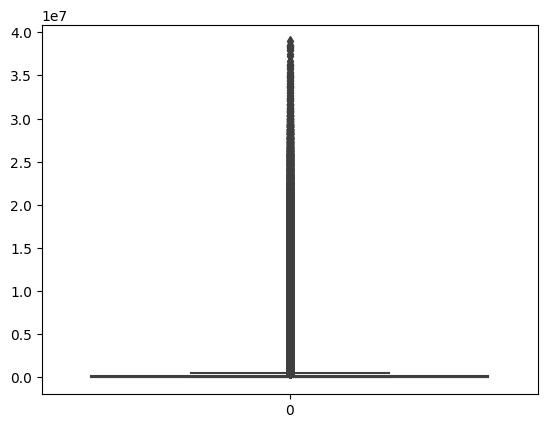

In [ ]:
sns.boxplot(data['oldbalanceOrg'])

<Axes: >

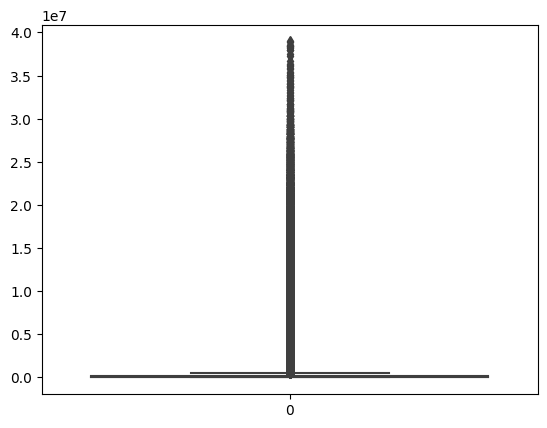

In [ ]:
sns.boxplot(data['newbalanceOrig'])

Resolving multicollinearity involves reducing or eliminating high correlations between independent variables (features) in your dataset.

**1**.Create a Variance Threshold object with a thresold value
for example
thresold=0.95
selector=VarianceThresold(thresold=thresold)

Fit and transform the data to retain non-correlated features.

**2**.Principal component analysis


<ipython-input-21-d46f26359dc9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data[features].corr(),cbar=True,fmt='.2f',xticklabels=features,annot_kws={'size':15},yticklabels=features,alpha=0.7,cmap='coolwarm',square=True,annot=True)


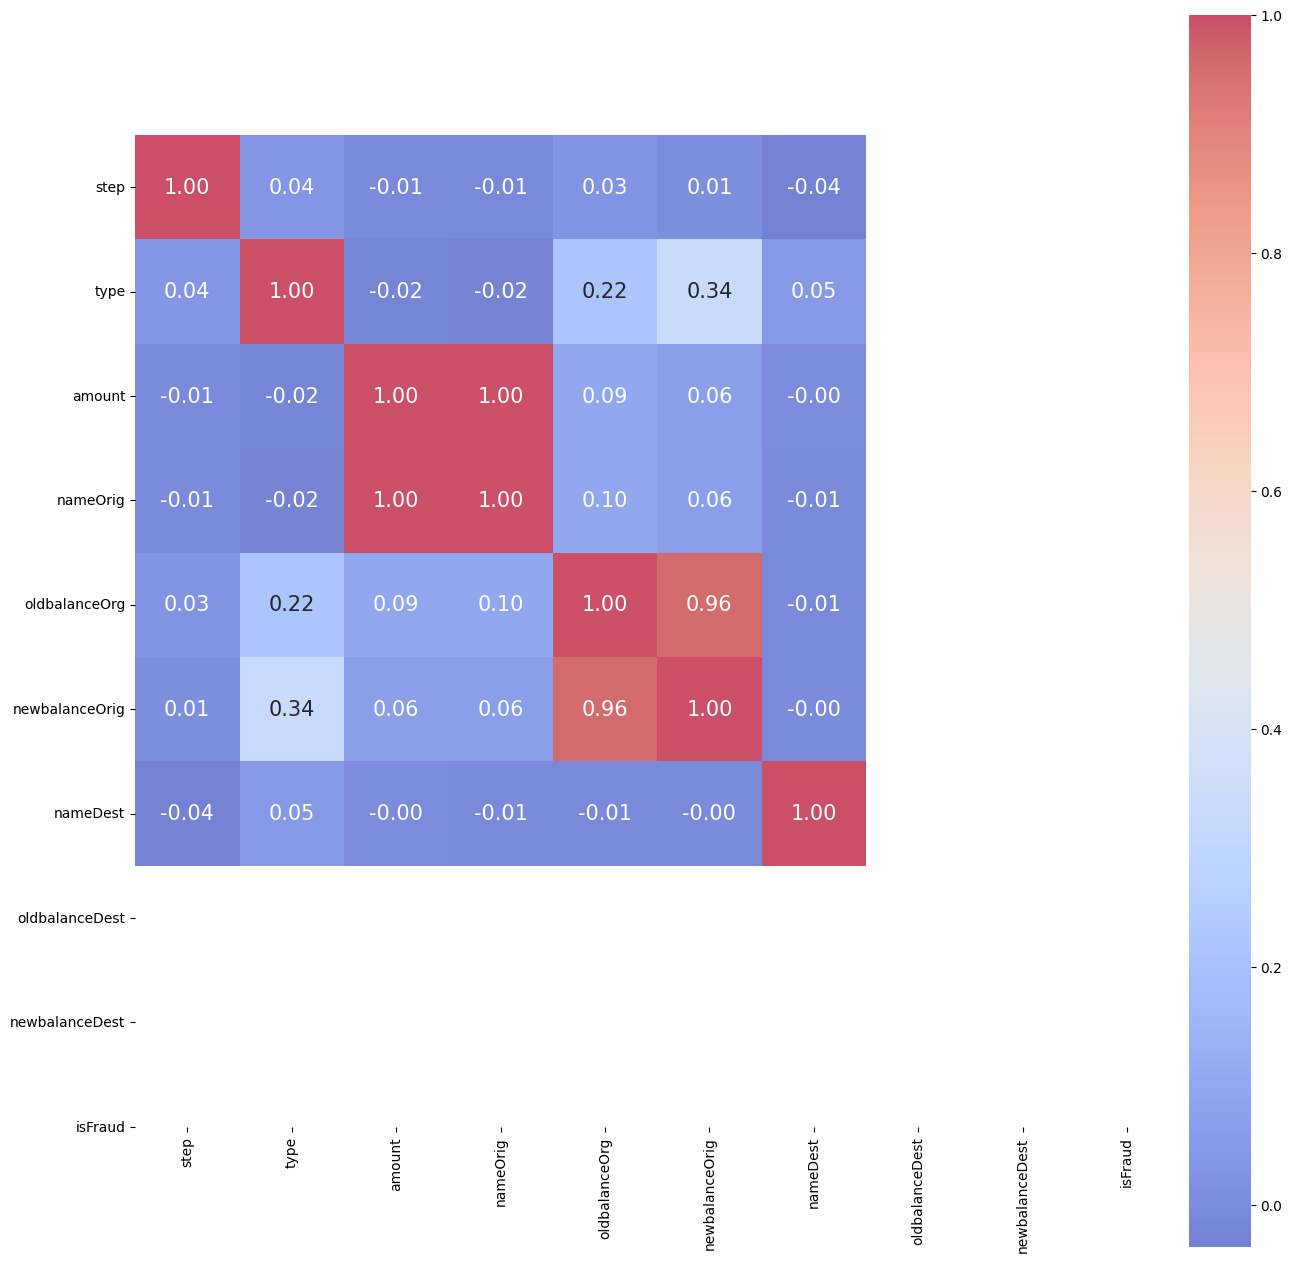

In [ ]:
## exploring correlations
plt.figure(figsize=(16,16))
sns.heatmap(data=data[features].corr(),cbar=True,fmt='.2f',xticklabels=features,annot_kws={'size':15},yticklabels=features,alpha=0.7,cmap='coolwarm',square=True,annot=True)
plt.show()

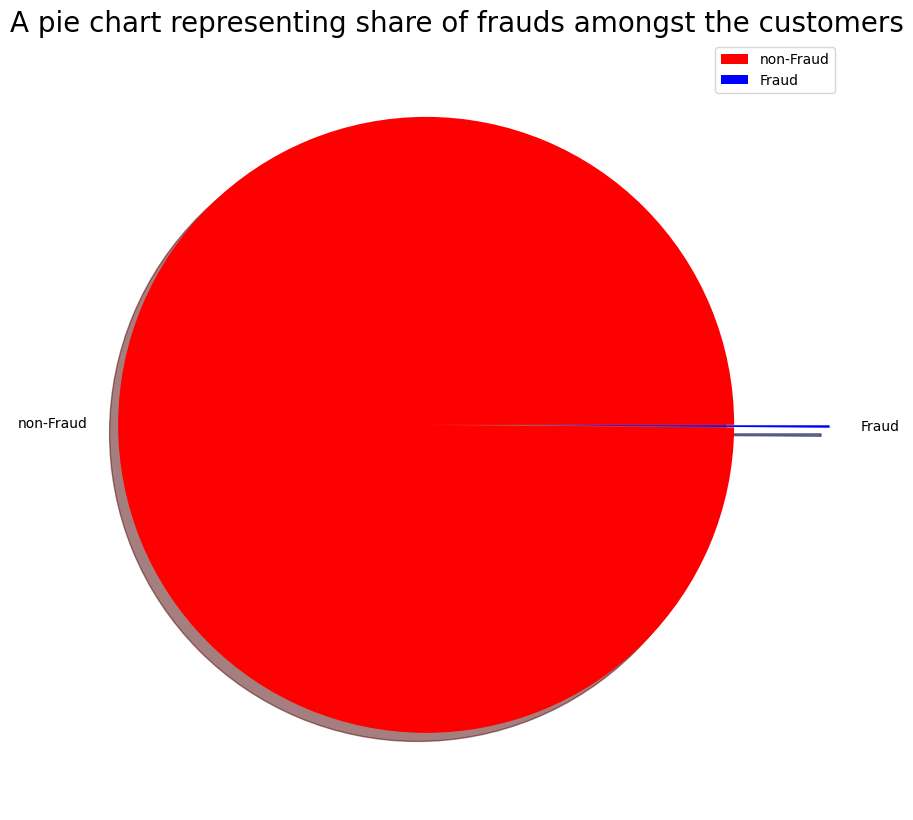

In [ ]:
## a pie chart distribution of fraud and non-fraud
labels=['non-Fraud','Fraud']
colors =['red','blue']
size =[6354407,8213]
explode= [0.1,0.21]
plt.rcParams['figure.figsize']=(10,10)
plt.pie(size,labels=labels,colors=colors,explode=explode,shadow=True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize=20)
plt.legend()
plt.show()

In [ ]:
data['type'].value_counts()

PAYMENT     83963
CASH_OUT    79299
CASH_IN     48520
TRANSFER    19726
DEBIT        1884
Name: type, dtype: int64

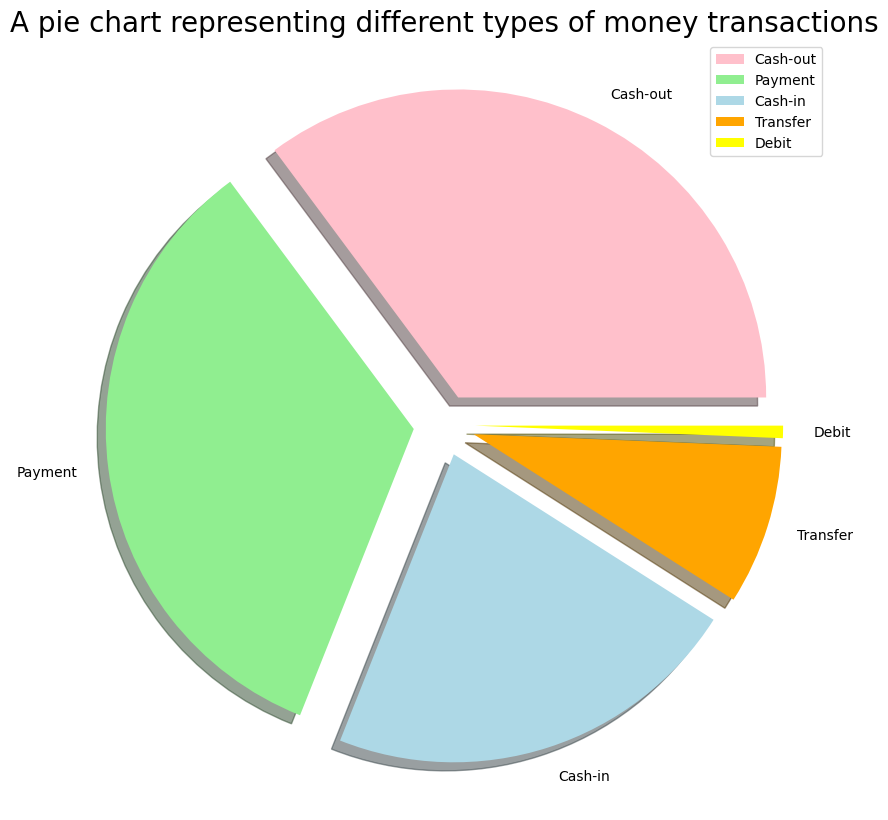

In [ ]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 14


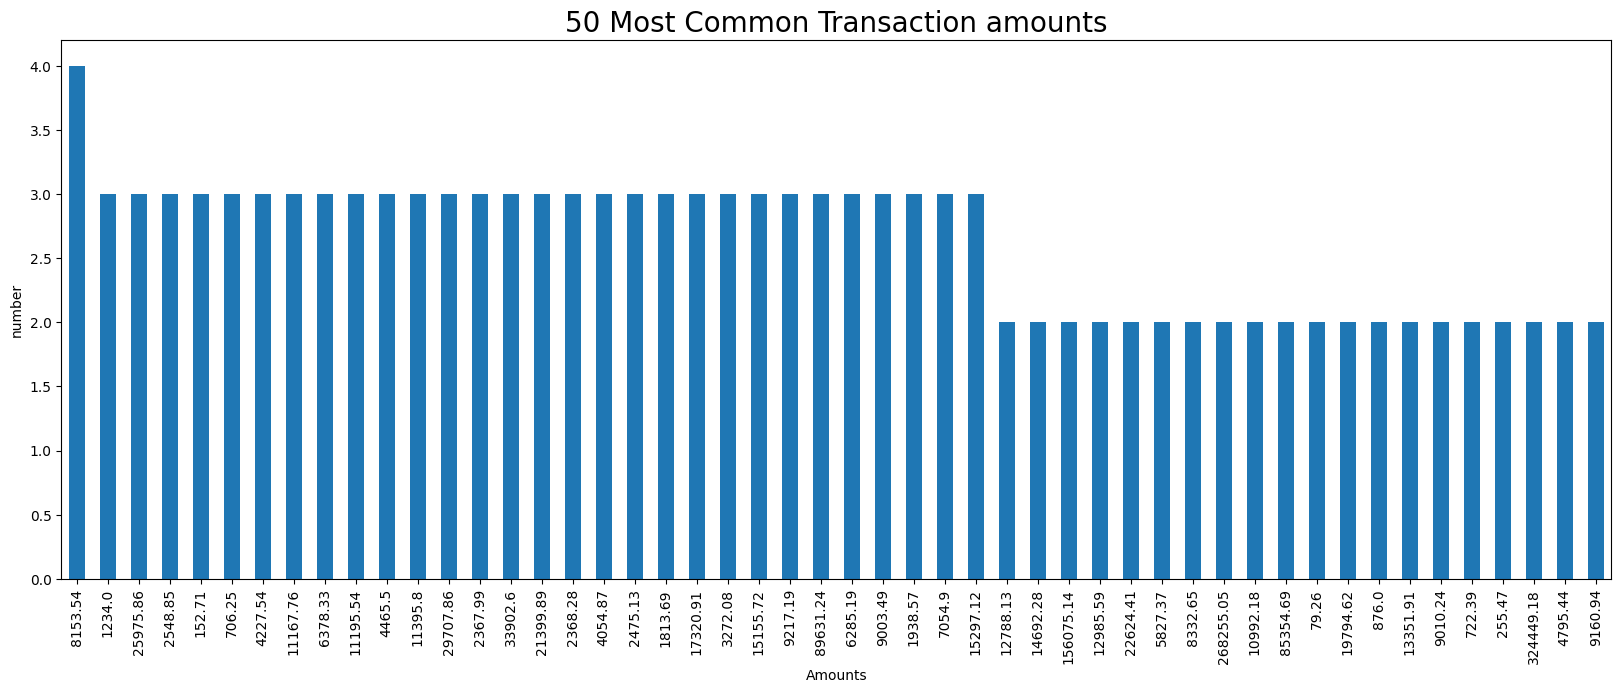

In [ ]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (20, 7)

data['amount'].value_counts().head(50).plot.bar()
plt.title('50 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('number')
plt.show()

In [ ]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 77
The number of fraudulent CASH_OUTs = 80


In [ ]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 164.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 164.0
Maximum Transaction : 10000000.0


In [ ]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape

(99025, 11)

Which columns we are including and excluding.

1.Excluding columns
nameOrig,nameDest,:This column's appears to represent a destination account identifier and Orgin account identifier. Similar to nameOrig, it might not provide direct insights, but if there are patterns related to specific accounts, you could encode them accordingly

In [ ]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(99025, 9)

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,181.0,0.0,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0.0,0.0
24,1,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,0.0


In [ ]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,181.0,0.0,0.0,0.00,1.0,0.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,1.0,0.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,0.0
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,0.0
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,0.0


In [ ]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud','isFlaggedFraud'], axis = 1)

In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00
3,1,1,181.00,181.0,0.0,21182.0,0.00
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44
19,1,0,215310.30,705.0,0.0,22425.0,0.00
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89


In [ ]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [ ]:
# checking the new shapes
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (74268, 7)
x_test:  (24757, 7)
y_train:  (74268,)
y_test:  (24757,)


In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

 We are preparing your data for training and testing a PyTorch neural network by converting it into PyTorch tensors. PyTorch tensors are multi-dimensional arrays that can be efficiently used for numerical computations in PyTorch.

 By converting your data into PyTorch tensors, you're preparing it to be compatible with PyTorch's tensor operations and to feed it into a neural network for training and testing. This conversion ensures that your data is in a format that can be efficiently processed by the neural network's computations and optimizations. Once your data is in tensor form, you can use it to define and train your neural network model using PyTorch

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32)

ARCHITECTURE

Here we have constructor
in this neural network we have input layer and hidden layers and output layers,with three hidden layers (128 units, 64 units, and 1 unit) and ReLU activation functions. The output is passed through a sigmoid activation function to obtain a probability score for binary classification.

In [ ]:
# Define neural network architecture
class FraudDetectionNN(nn.Module):
    def __init__(self, input_size):
        super(FraudDetectionNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        x = self.sigmoid(x)
        return x

input_size = X_train_tensor.shape[1]
model = FraudDetectionNN(input_size)

 The loss function (BCELoss) to measure the discrepancy between predicted and actual values, and the optimizer (Adam) to adjust the model's parameters based on the loss to improve its performance during training. These components work together to guide the training process, allowing the model to learn and improve its ability to make accurate predictions.

In [ ]:
# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


In [ ]:
# Training loop
epochs = 10
batch_size = 64
for epoch in range(epochs):
    for i in range(0, len(X_train_tensor), batch_size):
        batch_X = X_train_tensor[i:i+batch_size]
        batch_y = y_train_tensor[i:i+batch_size].view(-1,1)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

In [ ]:
# Evaluate the model
with torch.no_grad():
    model.eval()
    test_outputs = model(X_test_tensor)
    predicted_labels = (test_outputs >= 0.5).float()
    accuracy = (predicted_labels == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy.item():.4f}")

Test Accuracy: 0.9976


WE CAN USE DIFFRERENT MACHINE LEARNING MODELS FOR THIS TASK BUT I USED NEURAL NETWORKS.
1.LOGISTIC REGEESSION
2.RANDOM FOREST CLASSIFIER
3.DECISION TREE CLASSIFIER